In [1]:
import numpy as np

In [2]:
# The azimuth angles (in degrees) of the loudspeakers.
emitter_angles = [30, 110, 150, -150, -110, -30]

In [3]:
# Unit vectors for the loudspeakers. Not that the matrix is constructed as the transpose of the vectors.
# When P' = G * L, the result of P' is the correct p = g1 L1 + g2 L2 by scaled vector addition.
# The projections of the unit vectors sum to the unit vector in the direction of the source.
L = np.array((np.cos(np.radians(emitter_angles)), np.sin(np.radians(emitter_angles)))).T

In [4]:
# Create successive pairs of speaker angles until looping around. The pair (n1, n2) where 
# n1 is 'more clock-wise' than n2.
panning_pairs = [(i, i + 1) for i in range(len(emitter_angles) - 1)] + [(len(emitter_angles) - 1, 0)]

In [5]:
# The azimuth angles (in degrees) of the sources.
source_angles = [15, -15, 180, 0, 30]

In [6]:
# Calculate the cartesian directional unit vectors for the sound sources.
P = np.array((np.cos(np.radians(source_angles)), np.sin(np.radians(source_angles))))

In [7]:
# G is the matrix that contains the calculated gains between each emitter within
# a panning pair of emitters, for each emitter.
#
# For M sound sources, for N panning pairs, [n1, n2] where n1 is 'more clock-wise' than n2.
G = np.zeros((len(source_angles), len(emitter_angles), 2))

In [8]:
# For each source, calculate the gains matrix for all panning pairs.

# The directional unit vectors for a specific panning pair.
Ln1n2 = np.zeros((2, 2))

for m in range(len(source_angles)):
    pT = P[:, m].reshape(2, 1).T
    for n in range(len(emitter_angles)):
        panning_pair = list(panning_pairs[n])
        Ln1n2[:,:] = L[panning_pair,:]
        # del panning_pair
        G[m, n, :] = pT @ np.linalg.inv(Ln1n2)
    del pT

# del Ln1n2
# del m, n

In [9]:
class PannedSource:
    def __init__(self, source_angle, group, gains):
        self.source_angle = source_angle
        self.group = group
        self.gains = gains
        self.gains[gains < 0.000001] = 0.0
        

    def __str__(self):
        return f'{self.source_angle} = {self.gains[0]} * {self.group[0]} + {self.gains[1]} * {self.group[1]}'
    
    def pan(self, source, input):
        '''
        source.shape == (m, 1)
        input.shape == (m, n) where m is the number of samples and n is the number of channels/speakers.

        Returns an m x n array with panned source correctly mixed into the appropriate channels of input.
        Specifically, 
            output[:,self.group] = self.gains * source + input[self.group]
        '''

        return self.gains * np.repeat(source, 2).reshape(len(source), 2) + input[:,self.group]

valid_pannings = np.logical_and(G > 0, G < 1.00001)
panned_sources = [PannedSource(source_angle=source_angles[m],
                                group=panning_pairs[n],
                                gains=G[m, n, :]) for m in range(len(source_angles)) for n in range(len(emitter_angles)) if valid_pannings[m,n,:].all()]
# del valid_pannings
# del panning_pairs

In [10]:
[str(panned_source) for panned_source in panned_sources]

['15 = 0.2988584907226845 * 5 + 0.816496580927726 * 0',
 '-15 = 0.816496580927726 * 5 + 0.2988584907226845 * 0',
 '180 = 0.5773502691896258 * 2 + 0.5773502691896256 * 3',
 '0 = 0.5773502691896257 * 5 + 0.5773502691896257 * 0',
 '30 = 1.0 * 0 + 0.0 * 1']

In [15]:
fs = 48000
T = 3
#output = np.zeros(fs * 3, len(emitter_angles))
#source = np.arange(1, szBlock + 1)
#input = np.arange(1, szBlock * len(emitter_angles) + 1).reshape(szBlock, len(emitter_angles))


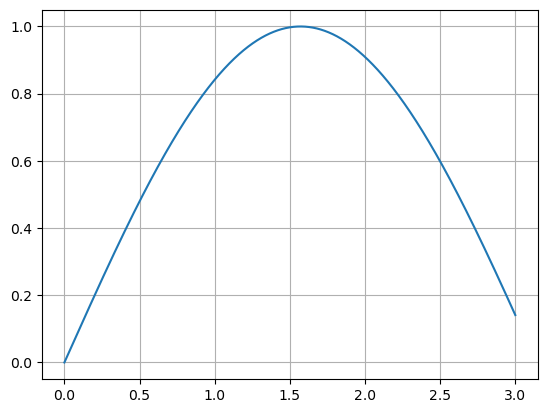

In [25]:
import matplotlib.pyplot as plt

t = np.linspace(0, T, fs * T)

plt.plot(t, np.sin(2 * np.pi * t))
plt.grid(True)
